In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
import randomized_ir

from utils import generate_poissonian_ns

In [146]:
from importlib import reload
reload(randomized_ir)


<module 'randomized_ir' from '/home/njvh/Documents/Science/sphere/detector-model/deconvolution/randomized_ir.py'>

## IR

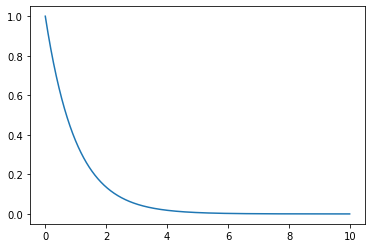

In [147]:
gamma = 1

pts_per_bin = 100
n_bins = 10

ir_x = np.arange(0, n_bins * pts_per_bin) / pts_per_bin
ir_y = np.exp(- gamma * ir_x)

rir = randomized_ir.RandomizedIR(ir_x, ir_y)

rir.plot_realization()

# Convoluted signal

In [148]:
N_bins = 4
n_mean = 10

Inbin times are distributed with mean = 0.503 and sigma=0.290


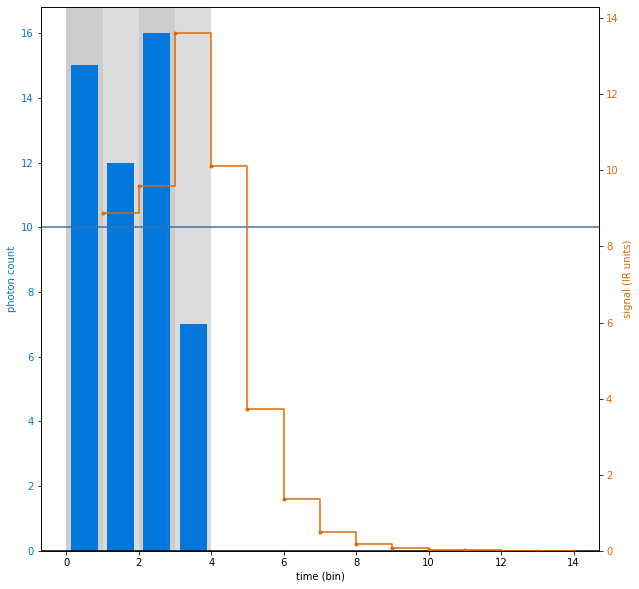

In [149]:
fig, ax1 = plt.subplots(figsize=(10, 10))
photon_color = '#0477DC'
photon_color_dimmed = '#3774A9'
signal_color = '#DC6904'

# delta_ns = generate_poissonian_ns(n_mean, N_bins)

ax1.axhline(0, color='black')
for i in range(N_bins):
    ax1.axvspan(i, i+1, facecolor=([0, 0, 0] if i % 2 == 0 else [0.3, 0.3, 0.3]), alpha=0.2 , edgecolor=None)

ax1.bar(np.arange(N_bins) + 0.5, delta_ns, width=0.75, color=photon_color)
ax1.axhline(n_mean, color=photon_color_dimmed)

ax1.set_xlabel('time (bin)')
ax1.set_ylabel('photon count', color=photon_color)
ax1.tick_params(axis='y', labelcolor=photon_color)

ax2 = ax1.twinx()

# signal_x, signal_y = rir.convolve_with_deltas(delta_ns, inbin_invcdf=lambda x: x**(1/10), debug_inbin_times=True)
signal_x, signal_y = rir.convolve_with_deltas(delta_ns)
ax2.step(signal_x, signal_y, '.-', where='post', color=signal_color)

ax2.set_ylabel('signal (IR units)', color=signal_color)
ax2.tick_params(axis='y', labelcolor=signal_color)

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()